(1797, 64)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(1797,)


<Figure size 576x396 with 0 Axes>

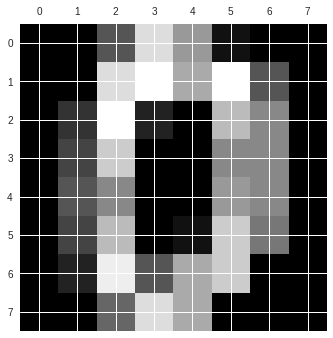

In [0]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
print(digits.data.shape)
print(list(digits.target_names))
print(digits.target.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [0]:
print(digits.data[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


In [0]:
import numpy as np
print((digits.data[digits.target==0]).shape)
unique_elements, counts_elements = np.unique(digits.target, return_counts=True)
print(unique_elements,counts_elements)

(178, 64)
[0 1 2 3 4 5 6 7 8 9] [178 182 177 183 181 182 181 179 174 180]


In [0]:
#X_train
train=digits.data[digits.target==0][0:100]
train=np.append(train,digits.data[digits.target==1][0:100],axis=0)
train=np.append(train,digits.data[digits.target==2][0:100],axis=0)
train=np.append(train,digits.data[digits.target==3][0:100],axis=0)
train=np.append(train,digits.data[digits.target==4][0:100],axis=0)
train=np.append(train,digits.data[digits.target==5][0:100],axis=0)
train=np.append(train,digits.data[digits.target==6][0:100],axis=0)
train=np.append(train,digits.data[digits.target==7][0:100],axis=0)
train=np.append(train,digits.data[digits.target==8][0:100],axis=0)
train=np.append(train,digits.data[digits.target==9][0:100],axis=0)
train=np.append(train,digits.data[digits.target==10][0:100],axis=0)
print(train.shape)

(1000, 64)


In [0]:
#Y_train
Y_train=digits.target[digits.target==0][0:100]
Y_train=np.append(Y_train,digits.target[digits.target==1][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==2][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==3][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==4][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==5][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==6][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==7][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==8][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==9][0:100])
Y_train=np.append(Y_train,digits.target[digits.target==10][0:100])
print(Y_train.shape)

(1000,)


BEFORE PCA: (1000, 64)
AFTER PCA: (1000, 3)
[[ -9.8596525    7.75032954 -21.48660164]
 [  1.67371033  13.79153116 -19.11248226]
 [ -2.57568487  11.44762085 -21.14164935]
 ...
 [-21.3196144   -9.62229152  -3.2825206 ]
 [-17.02355296  -3.98511598  -9.6502434 ]
 [-26.17659893  -7.36402587  -4.80946097]]


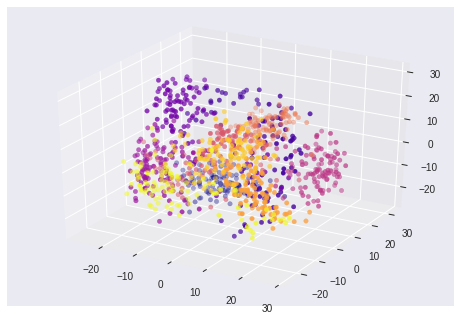

In [0]:
#PCA
print('BEFORE PCA:',train.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
train_after_PCA=pca.fit_transform(train)
print('AFTER PCA:',(train_after_PCA).shape)
print(train_after_PCA)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_PCA[:,0]
ydata = train_after_PCA[:,1]
zdata = train_after_PCA[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

BEFORE PCA: (1000, 64)
AFTER LDA: (1000, 3)
[[-2.21024406 -6.57893371  1.49556218]
 [-3.31607125 -4.25741316  2.02927022]
 [-1.73400496 -5.25934267  2.01606303]
 ...
 [ 2.29095954 -1.04920897 -0.82326097]
 [ 1.59692647 -0.39359492  0.70581953]
 [ 2.32307064 -1.84163341 -0.80759391]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


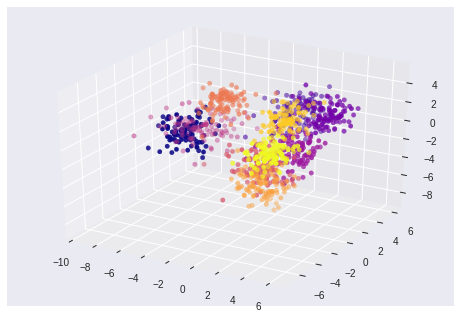

In [0]:
#LDA
print('BEFORE PCA:',train.shape)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)  
train_after_LDA = lda.fit_transform(train,Y_train) 
print('AFTER LDA:',(train_after_LDA).shape)
print(train_after_LDA)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_LDA[:,0]
ydata = train_after_LDA[:,1]
zdata = train_after_LDA[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

BEFORE ISOMAP: (1000, 64)
AFTER ISOMAP: (1000, 3)
[[197.74116932 -17.8825264   20.39322969]
 [215.94553104 -14.31696065   9.75168238]
 [169.97700777 -11.35726163   5.93084201]
 ...
 [ 53.01369424 -87.46800828  -9.81002929]
 [ 60.80113046 -59.98151368  12.60063093]
 [ 44.435729   -98.93533415 -18.89139487]]


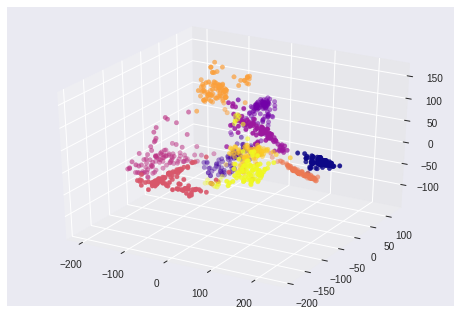

In [0]:
#ISO MAP
print('BEFORE ISOMAP:',train.shape)
from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
train_after_ISOMAP = embedding.fit_transform(train)
print('AFTER ISOMAP:',(train_after_ISOMAP).shape)
print(train_after_ISOMAP)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_ISOMAP[:,0]
ydata = train_after_ISOMAP[:,1]
zdata = train_after_ISOMAP[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

BEFORE LLE: (1000, 64)
AFTER LLE: (1000, 3)
[[ 6.68604629e+00  3.58547675e+01  3.27485529e-03]
 [ 6.66987718e+00  3.58553754e+01  1.54289550e-03]
 [ 6.66678459e+00  3.58554917e+01  1.21163147e-03]
 ...
 [-6.74562615e-01  3.35243231e+01  8.55511309e-03]
 [-6.63377843e-01  3.35271843e+01  8.75410426e-03]
 [-7.00592292e-01  3.35179788e+01  7.99626196e-03]]


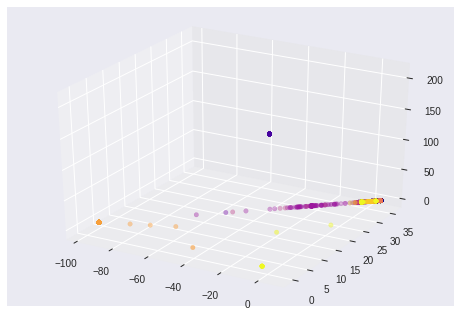

In [0]:
#ISO MAP
print('BEFORE LLE:',train.shape)
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=3)
train_after_LLE = embedding.fit_transform(train)*1000
print('AFTER LLE:',(train_after_LLE).shape)
print(train_after_LLE)

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = train_after_LLE[:,0]
ydata = train_after_LLE[:,1]
zdata = train_after_LLE[:,2]
ax.scatter3D(xdata, ydata, zdata, c=Y_train, cmap='plasma');

In [0]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import h5py

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file
File_ID = '0B1uNIZBUi1VzdTl1UHNGNmItZ0VWQ1B3SGEzWEdhSElWUnJV'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('faceimages.mat')

f = h5py.File('faceimages.mat','r') 
data = f.get('data') 
data = np.array(data).T
  

    100% |████████████████████████████████| 993kB 18.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
import matplotlib.pyplot as plt
data.shape


(400, 10305)

[59. 63. 67. ... 34. 33. 34.]


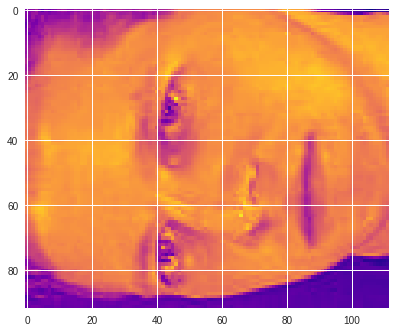

In [0]:
X=data[:,:-1]
print(X[1])
img=X[1].reshape(92,112)
#print(img.shape)
plt.imshow(img,cmap="plasma")
#print(X.shape)
Y=data[:, :1]
#print(X[:,0])
#print(len(X[:,0]))

In [0]:
X=X-np.mean(X, axis=0)
X

array([[-37.7275, -39.91  , -38.8825, ..., -27.105 , -27.8   , -28.3925],
       [-26.7275, -22.91  , -18.8825, ..., -38.105 , -40.8   , -41.3925],
       [-45.7275, -35.91  , -34.8825, ..., -44.105 , -46.8   , -47.3925],
       ...,
       [ 35.2725,  36.09  ,  37.1175, ..., -32.105 , -34.8   , -36.3925],
       [ 32.2725,  32.09  ,  32.1175, ...,  17.895 ,  18.2   ,  13.6075],
       [ 36.2725,  37.09  ,  38.1175, ..., -38.105 , -42.8   , -40.3925]])

In [0]:
print('COVARIANCE MATRIX')
X_cov=np.cov(X.T)
print(X_cov.shape)

COVARIANCE MATRIX
(10304, 10304)


In [0]:
from numpy import linalg as LA
eigen_values,eigen_vectors=LA.eig(X_cov) #w=eigen values ,v=eigen vectors

In [0]:
v.shape

(10304, 10304)

In [0]:
Projection=(eigen_vectors.T.dot(X.T)).T#400X10304


In [0]:
required_dimension=10
After_Reduction=Projection[:,:required_dimension]
After_Reduction.shape

(400, 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


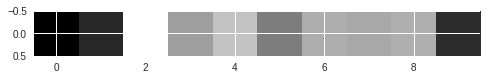

In [0]:
a= After_Reduction[0]
# a = np.reshape()
a = a.astype(float)
plt.imshow(np.atleast_2d(a))